In [140]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [141]:
df= pd.read_csv("Walmart_Store_sales.csv")
df["Date"] = pd.to_datetime(df["Date"])

/tmp/ipykernel_9000/2726749260.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [142]:
desc = df.describe(include="all")
desc.loc["NUll_perc"]=(len(df)-desc.loc["count",:])/len(df) *100
desc.loc['unique'] = [len(df[col].unique()) for col in df.columns]
desc

/tmp/ipykernel_9000/3074941053.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,20.000000,86,1.370000e+02,3.000000,131.000000,121.000000,136.000000,105.000000
top,NaN,2012-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500


In [143]:
df.dropna(inplace=True, subset=['Weekly_Sales'])
print(df.shape)
desc_dropna = df.describe(include="all")
desc_dropna.loc["NUll_perc"]=(len(df)-desc_dropna.loc["count",:])/len(df) *100
desc_dropna.loc['unique'] = [len(df[col].unique()) for col in df.columns]
desc_dropna.loc['types'] = df.dtypes
desc_dropna


(136, 8)


/tmp/ipykernel_9000/900588571.py:3: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,136.0,118,136.0,125.0,121.0,124.0,125.0,122.0
unique,20.0,80,136.0,3.0,120.0,114.0,124.0,101.0
top,NaN,2012-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.014706,NaN,1249535.827941,0.072,60.853967,3.316992,178.091144,7.665582
std,6.124614,NaN,647463.042349,0.259528,18.514432,0.47954,40.243105,1.619428
min,1.0,NaN,268929.03,0.0,18.79,2.514,126.111903,5.143
25%,4.0,NaN,605075.7175,0.0,45.22,2.8385,131.637,6.69


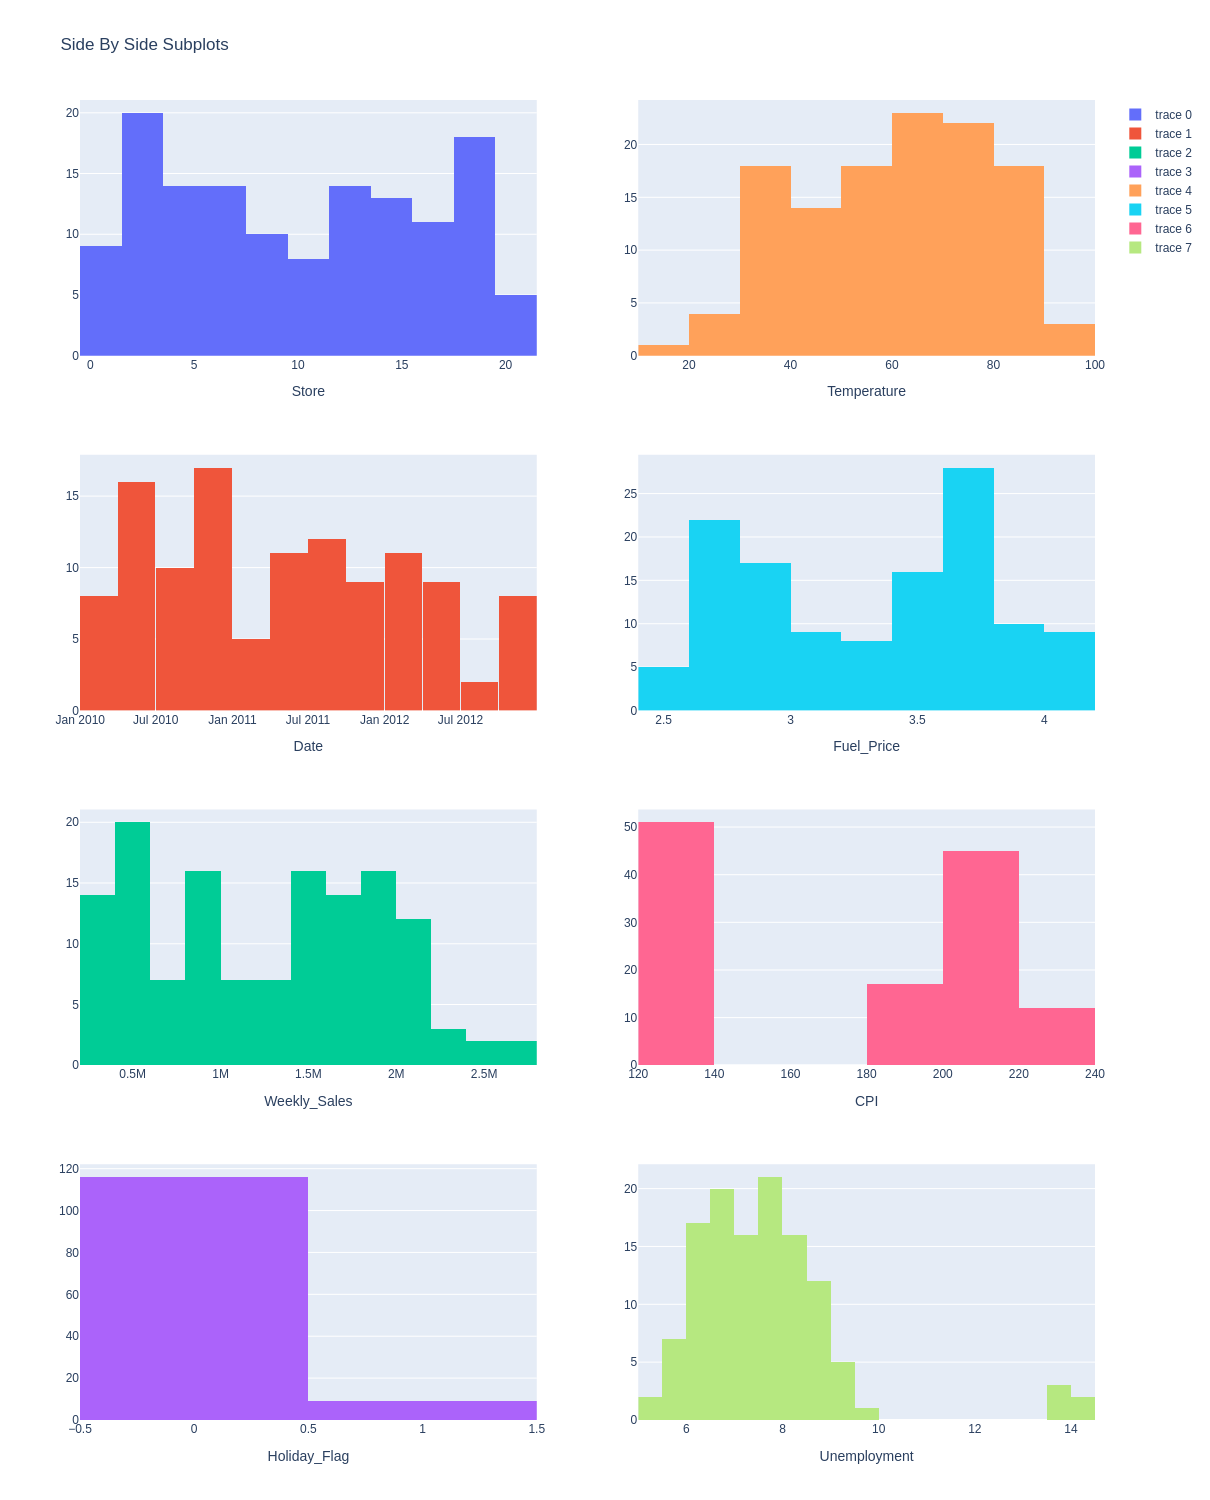

In [110]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=2)
row=1
coln = 1 
for col in df.columns:
    fig.add_trace(
        go.Histogram(x=df[col]),
    row=row, col=coln)
    fig.update_xaxes(title_text=col, row=row, col=coln)
    if row%4==0:
        row=0
        coln+=1
    row+=1
fig.update_layout(height=1500, width=1200, title_text="Side By Side Subplots")    
fig.show()

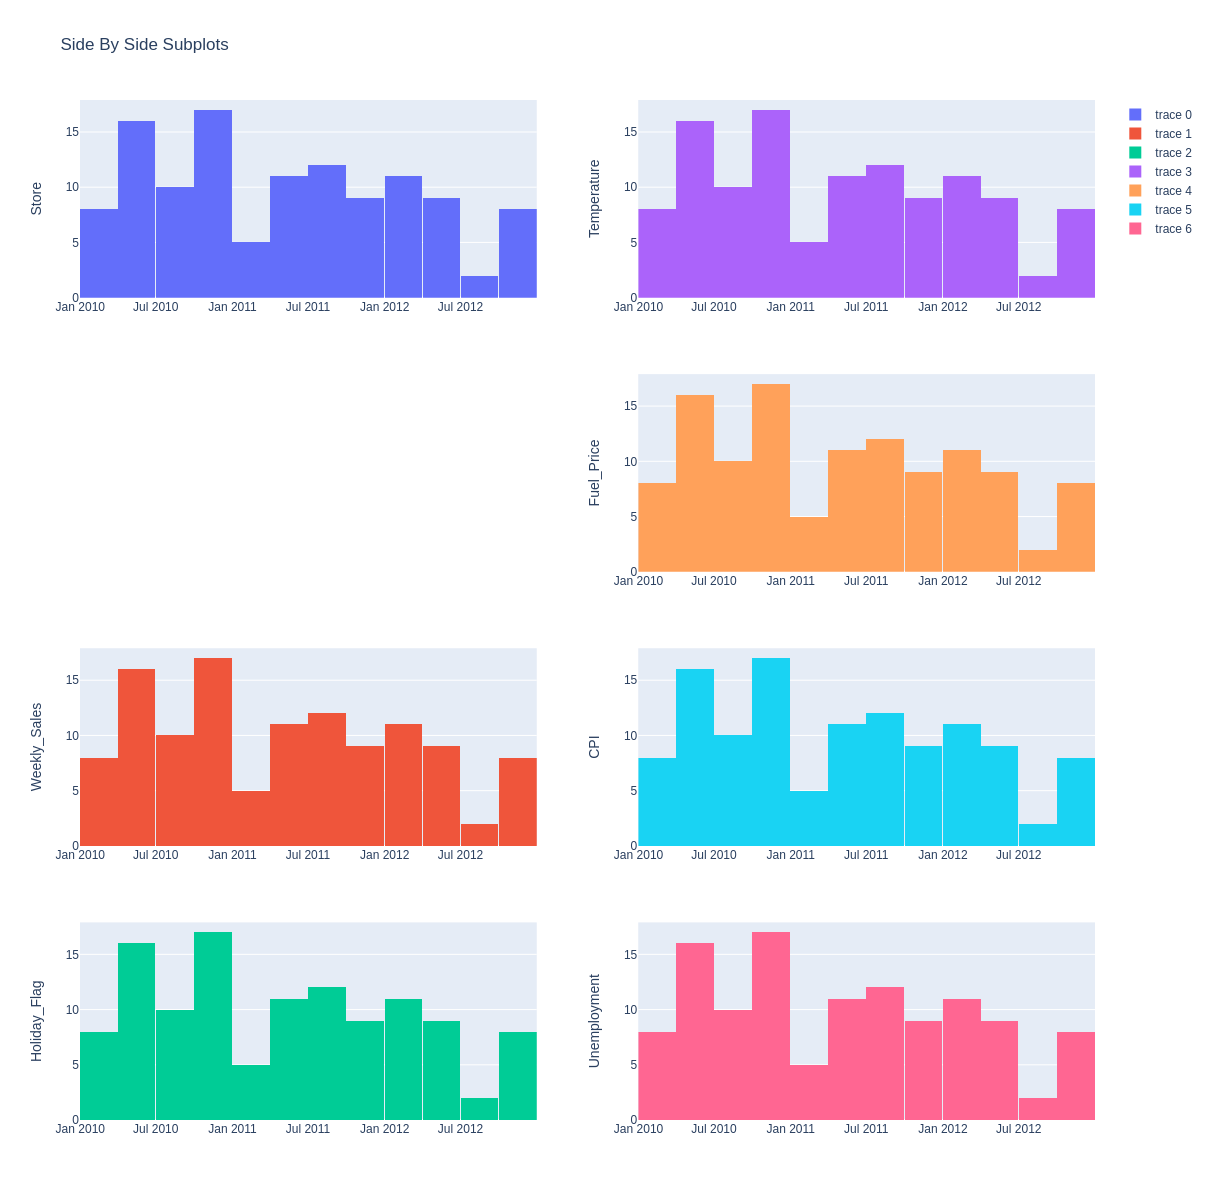

In [112]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=2)
row=1
coln=1
for col in df.columns:

    if col!="Date":
        fig.add_trace(
            go.Histogram(x=df["Date"],y=df[col]),
        row=row, col=coln)
        fig.update_yaxes(title_text=col, row=row, col=coln)
    if row%4==0:
        row=0
        coln+=1
    row+=1

fig.update_layout(height=1200, width=1200, title_text="Side By Side Subplots")    
fig.show()

/home/reda/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



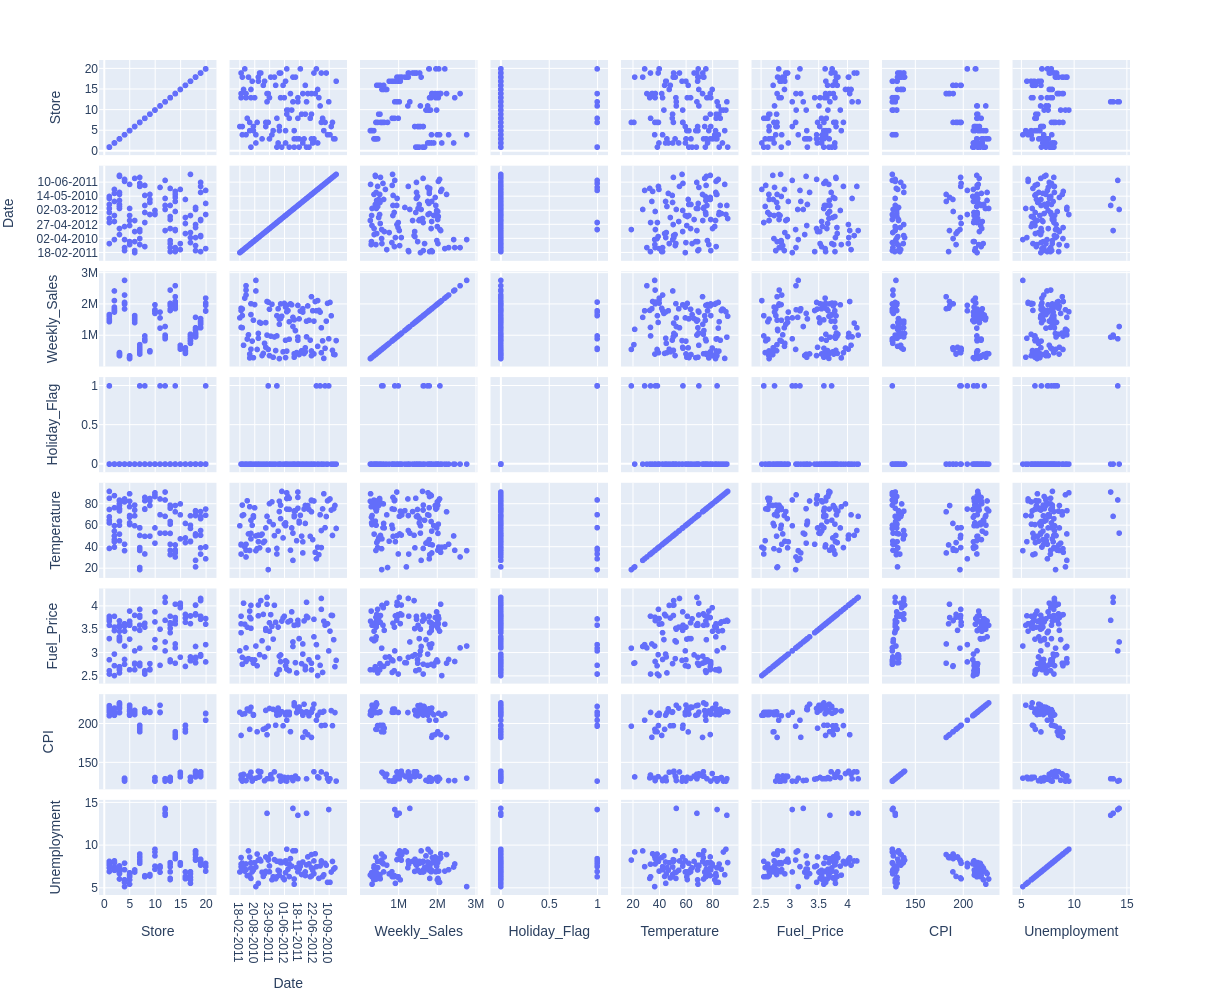

In [70]:
fig = px.scatter_matrix(df)
fig.update_layout(height=1000, width=1000)
fig.show()

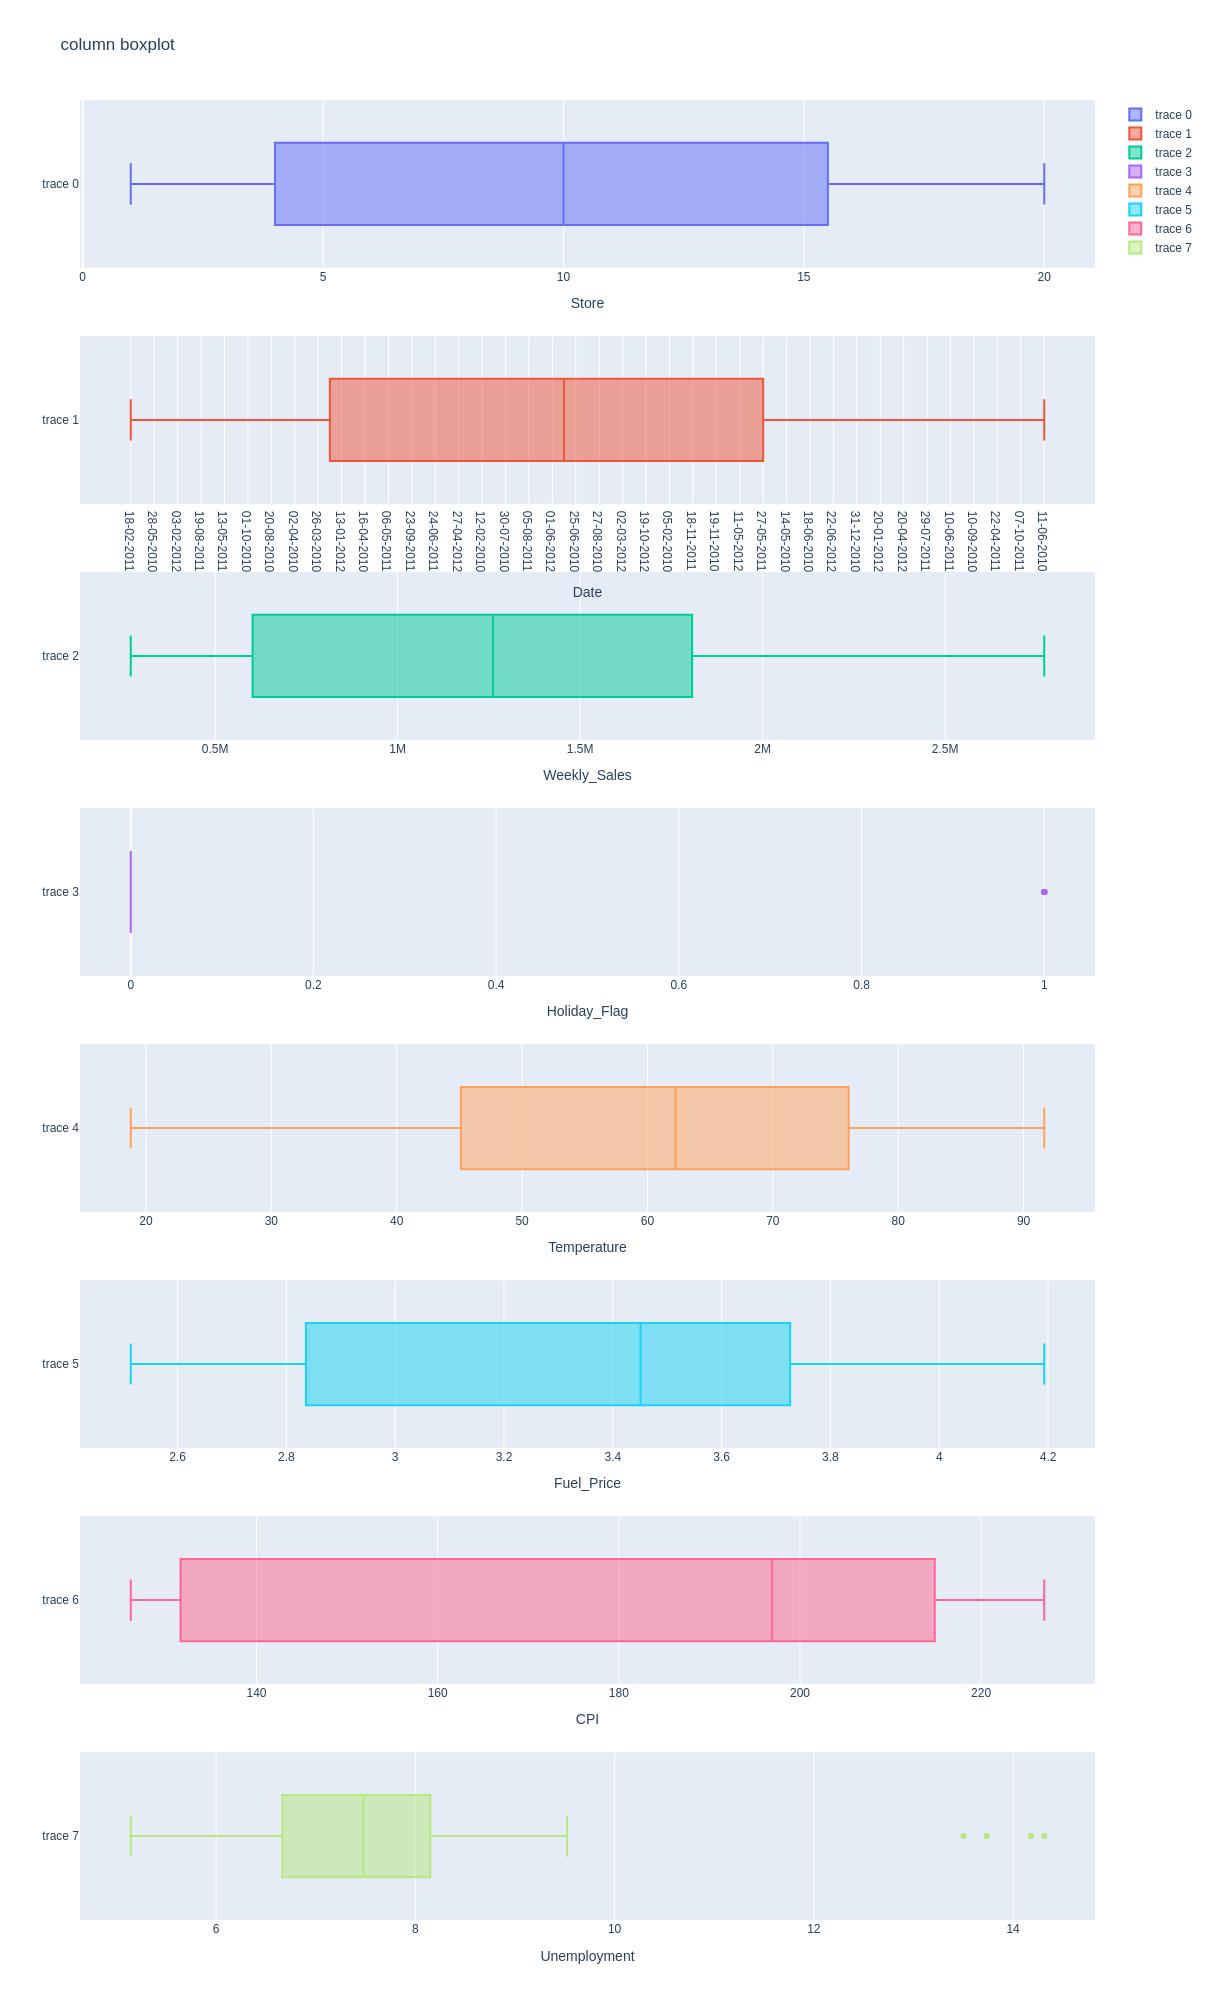

In [71]:

fig2 = make_subplots(rows=8, cols=1)
row=1
for col in df.columns:
    fig2.add_trace(
        go.Box(x=df[col]),
    row=row, col=1)
    fig2.update_xaxes(title_text=col, row=row, col=1)
    row+=1
fig2.update_layout(height=2000, width=800, title_text="column boxplot")    
fig2.show()

In [136]:
m=df['Temperature'].mean()
print(m)
st = df['Temperature'].std()
print(st)
print(m+3*st)
len(df[df['Temperature']>=m+3*st])

61.398106060606054
18.37890061969609
116.53480791969432


0

In [144]:
# drop outliers
numerical_col = ["Store","Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
for col in numerical_col:
    print(col)
    print(len(df))
    df = df[ ((df[col].isnull()) | (df[col]<desc_dropna.loc["mean",col] + 3*desc_dropna.loc["std",col]) ) &((df[col].isnull()) | (df[col]>desc_dropna.loc["mean",col] - 3*desc_dropna.loc["std",col]))]
    print(len(df))
df.shape                                                                                

Store
136
136
Weekly_Sales
136
136
Temperature
136
136
Fuel_Price
136
136
CPI
136
136
Unemployment
136
131


(131, 8)

In [145]:

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


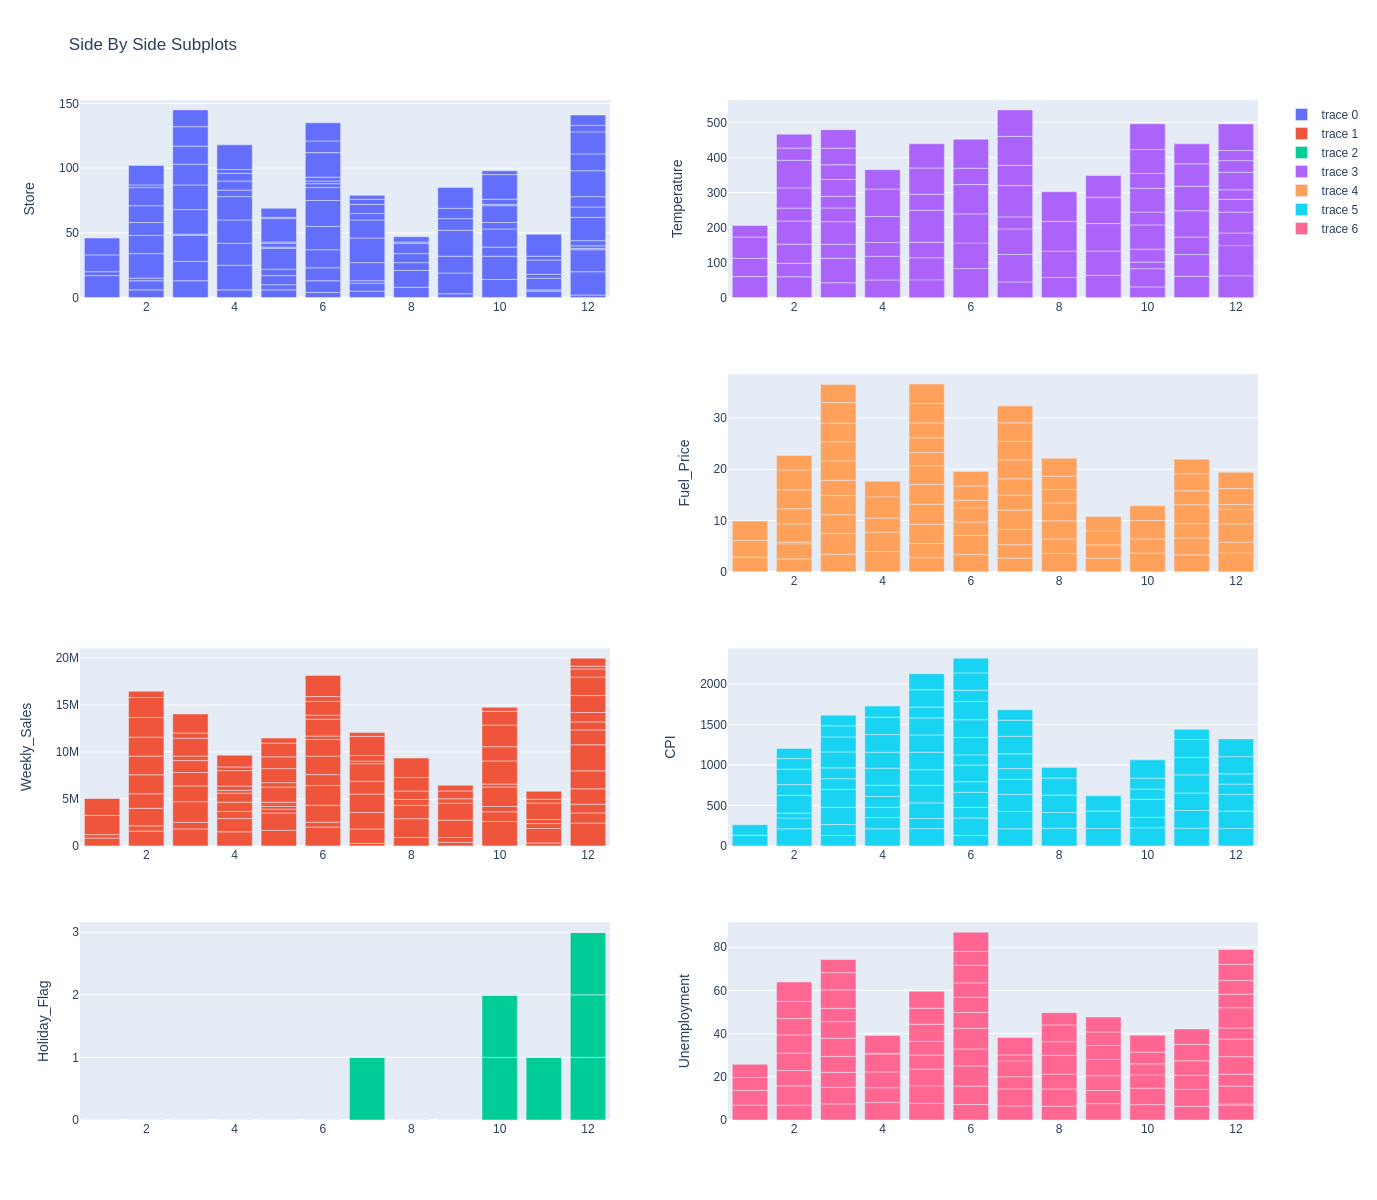

In [146]:
fig = make_subplots(rows=4, cols=2)
row=1
coln=1
for col in df.columns:

    if col not in ["Date","day","month","year"]:
        fig.add_trace(
            go.Bar(x=df["month"],y=df[col]),
        row=row, col=coln)
        fig.update_yaxes(title_text=col, row=row, col=coln)
    if row%4==0:
        row=0
        coln+=1
    row+=1

fig.update_layout(height=1200, width=1200, title_text="Side By Side Subplots")    
fig.show()

In [154]:
X= df[["Store","Temperature","Fuel_Price","CPI","Unemployment",'day','month','year','Holiday_Flag']]
Y = df["Weekly_Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [155]:
numeric_features = ["Temperature","Fuel_Price","CPI","Unemployment"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])
categorical_features = ['Holiday_Flag','Store'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [167]:
from sklearn.model_selection import GridSearchCV
params_r = {
    'alpha': [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1] # 0 corresponds to no regularization
}
params_l = {
    'alpha': [50,60,70,80,90,100,120,150] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(Ridge(), param_grid = params_r, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.0001}
Best R2 score :  0.9392861107738788


In [168]:
gridsearch = GridSearchCV(Lasso(), param_grid = params_l, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 80}
Best R2 score :  0.9393301583310819


In [170]:
best_ridge = Ridge(0.0001)
best_lasso= Lasso(80)
best_ridge.fit(X_train,Y_train)
best_lasso.fit(X_train,Y_train)
print("lasso score")
print(best_lasso.score(X_test,Y_test))
print(best_lasso.score(X_train,Y_train))
print('ridge score')
print(best_ridge.score(X_test,Y_test))
print(best_ridge.score(X_train,Y_train))

lasso score
0.9433598773543511
0.964266461355633
ridge score
0.9428304626256301
0.9642804020744931


In [ ]:
best_lasso.coef